## Run A Simple Machine Learning model 

In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

In [19]:
wine = load_wine()
X , y = wine.data[: , 11:13] , wine.target

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [21]:
clf.score(X,y)
# this is the mean accuracy
# this is  a clear sign of overfitting

1.0

## Bagging Technique:


In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
# base_estimator is the classifier we want to use for our bagging technique.
# max_samples indicates how much of the data we want to use for bagging (float)
# max_features indicates the portion of features we want to use (float)
# n_estimators is the number of classifiers used
bg = BaggingClassifier(base_estimator = clf , max_samples = 0.1 , max_features = 0.1 , n_estimators = 10)
bg.fit(X , y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.1)

In [24]:
bg.score(X , y)

0.8370786516853933

<AxesSubplot:>

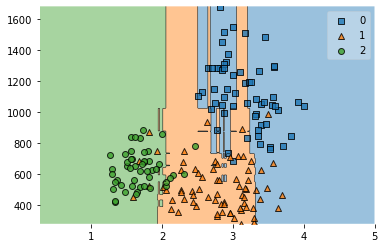

In [25]:
# plot the decision boundaries of the model
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X , y , bg)

## Boosting Technqiues:

##### 1- AdaBoost: Adaptive Boosting
##### 2- Gradient Boosting Machine (GBM)
##### 3- eXtreme Gradient Boosting Machine (XGBM)
##### 4- Light GBM
##### 5- CatBoost for categorical features

In [27]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [30]:
clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 1)

0.601123595505618


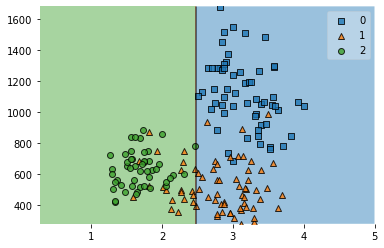

0.7303370786516854


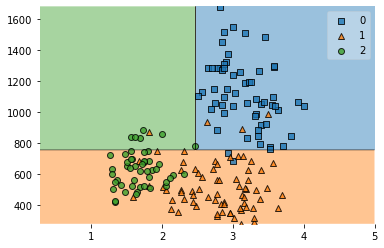

0.8595505617977528


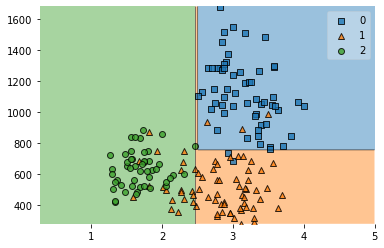

0.8595505617977528


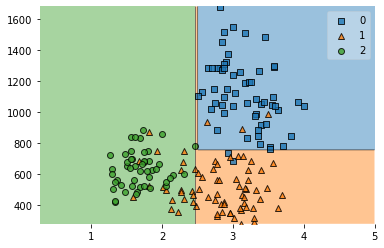

In [31]:
n_est = [1 , 2 , 5 , 10]
for num_est in n_est:

  clf_boost = AdaBoostClassifier(base_estimator = clf , n_estimators = num_est)
  clf_boost.fit(X , y)
  print(clf_boost.score(X , y))
  plot_decision_regions(X , y , clf_boost)
  plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train , y_train)

GradientBoostingClassifier()

In [34]:
model.score(X_test , y_test)

0.8888888888888888

In [35]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train , y_train)

[14:05:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\motam\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\motam\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
model.score(X_test , y_test)

0.9259259259259259

## Stacking Technique:


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [38]:
clfk = KNeighborsClassifier(n_neighbors = 1)
clfg = GaussianNB()
clfr = RandomForestClassifier()
lr = LogisticRegression()

In [39]:
sclf = StackingClassifier(classifiers = [clfk , clfg , clfr] , meta_classifier = lr)

In [40]:
clfs = [clfk , clfg , clfr , sclf]

Acc 0.6851851851851852


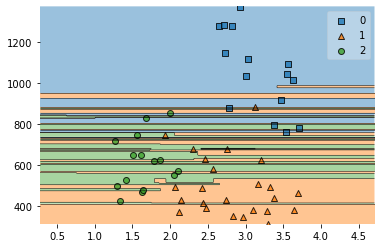

Acc 0.9629629629629629


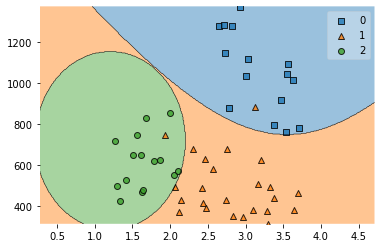

Acc 0.9259259259259259


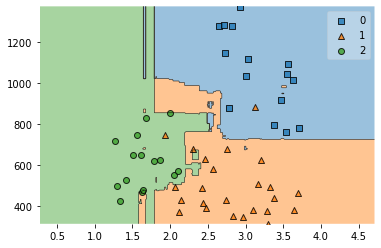

Acc 0.8518518518518519


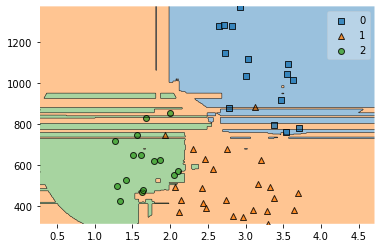

In [41]:
for classifier in clfs:
  classifier.fit(X_train , y_train)
  print('Acc' , classifier.score(X_test , y_test))

  plot_decision_regions(X_test , y_test , classifier)
  plt.show()